<a href="https://colab.research.google.com/github/Cyberine101/ML-Algorithms/blob/main/DecisionTree(Sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from google.colab import files

#upload 3 files for algorithm
files.upload()
files.upload()
files.upload()

train = pd.read_csv("train.csv") #read train dataset
test = pd.read_csv("test.csv") #read test dataset
gender_submission = pd.read_csv("gender_submission.csv") #read rest of test dataset

Saving train.csv to train.csv


Saving test.csv to test.csv


Saving gender_submission.csv to gender_submission.csv


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

#convert sex in train dataset to number representation
def num_Rep_Sex_TrainX():
  sex_trainX = train.iloc[:,4] #store genders of titanic victims in train data
  new_sex_trainX = [] #store number representations of the genders

  #male victims will be represented by 1's and females will be represented by 0's
  #this is so all features will be numbers, so calculations will be easier
  for i in sex_trainX:
    if (i == 'female'):
      new_sex_trainX.append(0)
    else:
      new_sex_trainX.append(1)

  return new_sex_trainX

#convert sex in test dataset to number representation
def num_Rep_Sex_TestX():
  sex_testX = test.iloc[:,3] #store genders of titanic victims in test data
  new_sex_testX = [] #store number representations of genders

  #males are represented by 1's and females are represented by 0's
  for i in sex_testX:
    if (i == 'female'):
      new_sex_testX.append(0)
    else:
      new_sex_testX.append(1)

  return new_sex_testX

new_sex_trainX = num_Rep_Sex_TrainX()
new_sex_testX = num_Rep_Sex_TestX()

Selected features for train dataset: 
[[ 3.  1.  3. ...  3.  1.  3.]
 [ 1.  0.  0. ...  0.  1.  1.]
 [22. 38. 26. ... nan 26. 32.]]

Selected features for test dataset: 
[[ 3.   3.   2.  ...  3.   3.   3. ]
 [ 1.   0.   1.  ...  1.   1.   1. ]
 [34.5 47.  62.  ... 38.5  nan  nan]]

Decision Tree Model Accuracy Score:  61.48325358851675 %

Plotted Decision Tree:


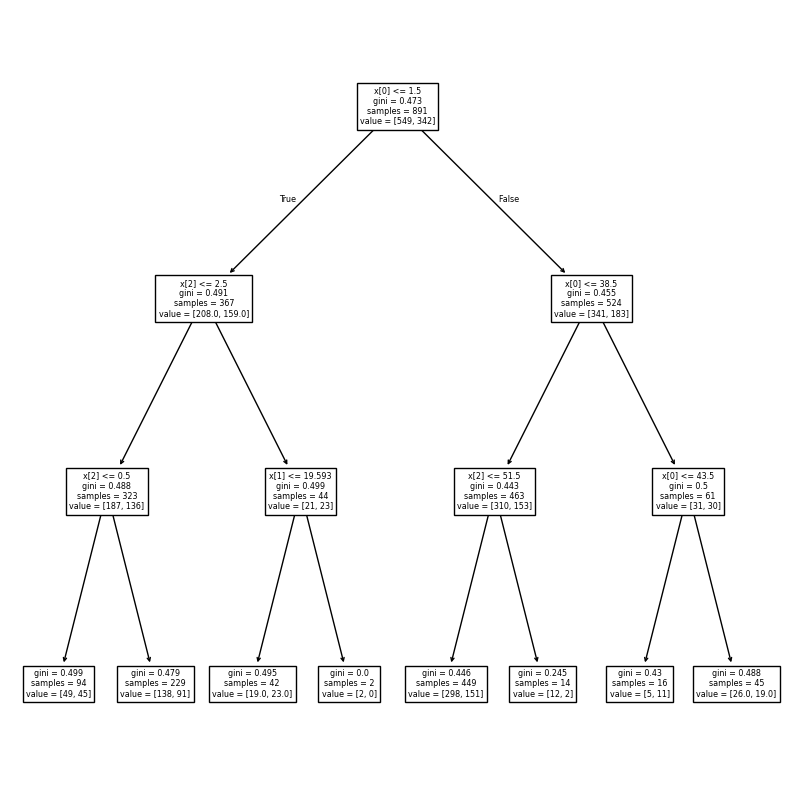

In [3]:
#From both datasets, I chose pclass, sex, and age because I believe they
#would lead to the least amount of impurity within a decision tree and
#give the most amount of information about titanic victims
trainX = np.array([train.iloc[:, 2], new_sex_trainX, train.iloc[:, 5]])  #train data features
trainY = train.iloc[:, 1] #train data target values

testX = np.array([test.iloc[:, 1], new_sex_testX, test.iloc[:, 4]]) #test data features
testY = gender_submission.iloc[:, 1] #test data target values

#Show selected features
print("Selected features for train dataset: ")
print(trainX)

print("\nSelected features for test dataset: ")
print(testX)

trainX = trainX.reshape(891, 3)  #allows for algorithm fitting
testX = testX.reshape(418, 3)

def train_imputer():
  #fill in missing values for train dataset
  imputer = SimpleImputer(strategy = 'mean')
  imputer = imputer.fit(trainX)
  data_trainX = imputer.transform(trainX)

  return data_trainX

def test_imputer():
  #fill in missing values for test dataset
  imputer = SimpleImputer(strategy = 'mean')
  imputer = imputer.fit(testX)
  data_testX = imputer.transform(testX)

  return data_testX

data_trainX = train_imputer()
data_testX = test_imputer()

#set up decision tree classifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=3)

#fit algoithm to training data
clf.fit(data_trainX, trainY)

pred_testY = clf.predict(data_testX)
print("\nDecision Tree Model Accuracy Score: ", accuracy_score(testY, pred_testY) * 100, "%")
plt.figure(figsize=(10, 10))

#plot decision tree
print("\nPlotted Decision Tree:")
tree.plot_tree(clf)

plt.show()

In [4]:
from sklearn.model_selection import cross_val_score

#Calculate 5-fold cross validation for Decision Tree algorithm
def tree_cross_validation():
  clf = DecisionTreeClassifier(max_depth=10)
  tree_validation_scores = cross_val_score(estimator=clf, X=data_trainX, y=trainY, cv=5, scoring="accuracy")

  return tree_validation_scores.mean()

#Display average classification accuracy of decision tree
print("Average classification accuracy of decision tree: ", (tree_cross_validation() * 100), "%" )

#calculate 5-fold cross validation for Random Forest algorithm
def forest_cross_validation():
  clf2 = RandomForestClassifier(n_estimators=200)
  forest_validation_score = cross_val_score(estimator=clf2, X=data_trainX, y=trainY, cv=5, scoring="accuracy")

  return forest_validation_score.mean()

#Display average classification accuracy of random forest
print("Average classification accuracy of random forest: ", (forest_cross_validation() * 100), "%")

Average classification accuracy of decision tree:  57.57202937668696 %
Average classification accuracy of random forest:  57.57014625572783 %
